In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PATH = 'Data_clean/'

In [2]:
df = pd.read_csv(PATH + 'Fuel Oil.csv', usecols=['Country or Area', 'Transaction', 'Year', 'Quantity'])

In [3]:
df

,Country or Area,Transaction,Year,Quantity
0,Afghanistan,Production,2020,5.0
1,Afghanistan,Production,2019,12.0
2,Afghanistan,Production,2018,20.0
3,Afghanistan,Production,2017,12.0
4,Afghanistan,Production,2016,10.0
...,...,...,...,...
97520,Zambia,Final consumption,1994,90.0
97521,Zambia,Final consumption,1993,93.0
97522,Zambia,Final consumption,1992,92.0
97523,Zambia,Final consumption,1991,92.0


In [4]:
len(df['Country or Area'].unique())

210

In [5]:
df_imports = df[df['Transaction'] == 'Imports']
df_exports = df[df['Transaction'] == 'Exports']

# Stats

In [6]:
df_imports['Quantity'].describe()

count     5072.000000
mean      1232.075300
std       4611.720864
min          0.000000
25%         15.780750
50%        102.430000
75%        685.829750
max      76356.200000
Name: Quantity, dtype: float64

In [7]:
df_exports['Quantity'].describe()

count     3199.000000
mean      2329.173653
std       5320.629334
min          0.000000
25%         78.500000
50%        560.000000
75%       2455.629000
max      63102.000000
Name: Quantity, dtype: float64

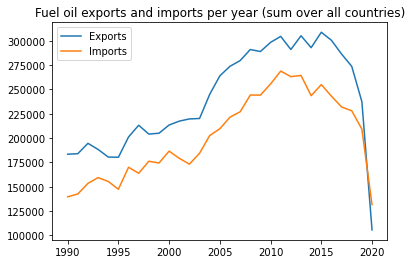

In [8]:
plt.plot(df_exports.groupby('Year').sum(), label = 'Exports')
plt.plot(df_imports.groupby('Year').sum(), label = 'Imports')
plt.title('Fuel oil exports and imports per year (sum over all countries)')
plt.legend()

# Error between imports and exports for all countries

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


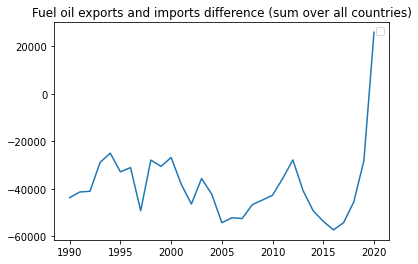

In [9]:
plt.plot(df_imports.groupby('Year').sum() - df_exports.groupby('Year').sum())
plt.title('Fuel oil exports and imports difference (sum over all countries)')
plt.legend()

In [11]:
(df_imports.groupby('Year').sum() - df_exports.groupby('Year').sum()).describe()

,Quantity
count,31.000000
mean,-38772.277293
std,15351.678863
min,-57386.587633
25%,-48014.573558
50%,-41388.644162
75%,-30848.570409
max,25961.314243


In [12]:
(df_imports.groupby('Year').sum() - df_exports.groupby('Year').sum()).sum()

Quantity   -1.201941e+06
dtype: float64

# Max im/export quantity and year by country

In [13]:
df_imports.groupby('Country or Area').max()

,Transaction,Year,Quantity
Country or Area,,,
Afghanistan,Imports,2019,4.0
Albania,Imports,2020,61.0
Algeria,Imports,2019,269.0
American Samoa,Imports,2019,0.1
Angola,Imports,2016,25.0
...,...,...,...
Yemen,Imports,2019,1368.0
Yemen Arab Rep. (former),Imports,1990,18.0
"Yemen, Dem. (former)",Imports,1990,0.0


In [14]:
df_exports.groupby('Country or Area').max()

,Transaction,Year,Quantity
Country or Area,,,
Albania,Exports,1995,60.000000
Algeria,Exports,2019,6940.000000
Angola,Exports,2019,632.000000
Argentina,Exports,2020,1521.000000
Armenia,Exports,2020,0.051681
...,...,...,...
Viet Nam,Exports,2020,400.000000
Yemen,Exports,2016,826.000000
"Yemen, Dem. (former)",Exports,1990,800.000000


# For Switzerland

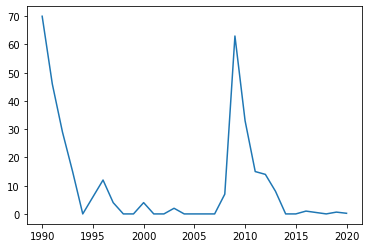

In [11]:
df_imports_Switz = df_imports[df_imports['Country or Area'] == 'Switzerland']
plt.plot(df_imports_Switz['Year'], df_imports_Switz['Quantity'])

Text(0.5, 1.0, 'Fuel oil exports and imports per year for Switzerland')

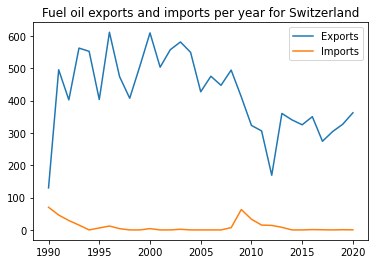

In [14]:
df_exports_Switz = df_exports[df_exports['Country or Area'] == 'Switzerland']
plt.plot(df_exports_Switz['Year'], df_exports_Switz['Quantity'], label = 'Exports')
plt.plot(df_imports_Switz['Year'], df_imports_Switz['Quantity'], label = 'Imports')
plt.legend()
plt.title('Fuel oil exports and imports per year for Switzerland')

# Minimum year data available per country

In [17]:
df_exports.groupby('Country or Area')['Year'].min()

Country or Area
Albania                     1990
Algeria                     1990
Angola                      1990
Argentina                   1990
Armenia                     2020
                            ... 
Viet Nam                    1995
Yemen                       1991
Yemen, Dem. (former)        1990
Yugoslavia, SFR (former)    1990
Zambia                      2009
Name: Year, Length: 138, dtype: int64

In [18]:
df_exports.groupby('Country or Area')['Year'].min().describe()

count     138.000000
mean     1991.956522
std         5.110272
min      1990.000000
25%      1990.000000
50%      1990.000000
75%      1991.750000
max      2020.000000
Name: Year, dtype: float64

In [19]:
df_imports.groupby('Country or Area')['Year'].min()

Country or Area
Afghanistan                 1990
Albania                     1990
Algeria                     1990
American Samoa              2011
Angola                      1990
                            ... 
Yemen                       1993
Yemen Arab Rep. (former)    1990
Yemen, Dem. (former)        1990
Yugoslavia, SFR (former)    1990
Zambia                      1995
Name: Year, Length: 200, dtype: int64

In [20]:
df_imports.groupby('Country or Area')['Year'].min().describe()

count     200.000000
mean     1991.935000
std         4.929735
min      1990.000000
25%      1990.000000
50%      1990.000000
75%      1992.000000
max      2012.000000
Name: Year, dtype: float64

In [24]:
df_imports.groupby('Country or Area')['Year'].count().describe()

count    200.000000
mean      25.360000
std        9.383531
min        1.000000
25%       24.750000
50%       30.000000
75%       31.000000
max       48.000000
Name: Year, dtype: float64

In [42]:
pd.DataFrame(df_imports.groupby('Country or Area')['Year'].count() == 48)

Country or Area
Afghanistan                 False
Albania                     False
Algeria                     False
American Samoa              False
Angola                      False
                            ...  
Yemen                       False
Yemen Arab Rep. (former)    False
Yemen, Dem. (former)        False
Yugoslavia, SFR (former)    False
Zambia                      False
Length: 200, dtype: bool

In [ ]:
df_imports.loc[:,df.any()]